# Simulation d'ODE/DAE en Python


**M. BUFFAT, dpt mécanique, Université Lyon 1**

In [1]:
%matplotlib inline
%autosave 300
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
from IPython.core.display import HTML
from IPython.display import display
from matplotlib import animation

Autosaving every 300 seconds


## Bibliothèque Scipy (méthode la plus complete)

- dans scipy.integrate  **ode** (version objet)

    - dopri5    RK4-5
    - dopri853  RK8
    - vode      implicite Adams (non raide) et BDF (raide)
    - lsoda     Adams Bashford et BDF

calcul automatique du pas en temps pour conserver une précision fixée
    
- attention à l'ordre des arguments pour F



## Bibliothèque Scipy (méthode la plus simple)
- **odeint** dans scipy.integrate
  - la méthode la plus simple a utilisée
  - utilise la bibliotheque lsoda
  - adams bashford pour les cas non raides
  - BDF dans les cas raides

## Package scikits.ode: resolution ODE et DAE

**scikit odes** fournit un accès aux solveurs d’équations différentielles ordinaires (ODE) et aux solveurs d’équations algébriques différentielles (DAE) non inclus dans scipy. 

Une fonction pratique **scikits.odes.odeint.odeint()** est disponible pour une intégration rapide, rapide et simple. 

La classe orientée objet: Les  solvers **scikits.odes.ode.ode** et **scikits.odes.dae.dae** sont disponibles pour un contrôle précis. 

Enfin, les solveurs de bas niveaux sont également exposés directement pour des besoins spécifiques.

- site web documentation: [https://scikits-odes.readthedocs.io/en/latest/](https://scikits-odes.readthedocs.io/en/latest/#)

- utilisation de sundials version 3.


In [2]:
# bibliotheque scikit
from scikits.odes.dae import dae
from scikits.odes.ode import ode

## choix du type de problème
 - explicite:
 
 $\dot{Y}= F(Y,t) $
 - implicite: 
 
 $G(\dot{Y},Y,t)$
 - DAE ODE avec contrainte:
 
 $G(\dot{Y},Y,t) $ avec contrainte $c(Y)=0$

### choix du solveur

 - odeint (scipy)
 
 - ode (scipy)

 - cvode
 
    ODE solver with BDF linear multistep method for stiff problems and Adams-Moulton linear multistep method for nonstiff problems. 
    
 - dopri5
 
    Part of scipy.integrate, explicit Runge-Kutta method of order (4)5 with stepsize control.
 - dop853
 
    Part of scipy.integrate, explicit Runge-Kutta method of order 8(5,3) with stepsize control.

 - ida
    Solver fora DAE (sundials)
    

## Probleme non raide
Oscillateur harmonique : pendule simple
$$  \frac{d^2\theta}{dt^2} + {\omega_0}^2 \theta = 0 $$

In [3]:
# parametres
g = 10.
l = 1.
omega0=np.sqrt(g/l)

In [4]:
# rhs dY/dt = rhs(t,Y)
nit = 0
def rhs(t,y,dy):
    global omega0,nit
    nit  += 1
    dy[0] =  y[1]
    dy[1] = -omega0*y[0]
    return

In [5]:
# C.I.
y0 = np.array([1.0,0.0])
t0 = 0.0
tfinal = 10*np.pi/omega0

## méthode RK avec ode

In [6]:
SOLVER = 'dopri5'
t      = np.linspace(0, tfinal,100)
initial_values = y0
ode_solver = ode(SOLVER, rhs, old_api=False)
nit = 0
output = ode_solver.solve(t, initial_values)
print("Nbre d'appel a rhs: ",nit)
output.message

Nbre d'appel a rhs:  1324


'computation successful'

In [7]:
output

SolverReturn(flag=<StatusEnumDOP.SUCCESS: 1>, values=SolverVariables(t=array([0.        , 0.10034938, 0.20069875, 0.30104813, 0.40139751,
       0.50174688, 0.60209626, 0.70244563, 0.80279501, 0.90314439,
       1.00349376, 1.10384314, 1.20419252, 1.30454189, 1.40489127,
       1.50524065, 1.60559002, 1.7059394 , 1.80628878, 1.90663815,
       2.00698753, 2.1073369 , 2.20768628, 2.30803566, 2.40838503,
       2.50873441, 2.60908379, 2.70943316, 2.80978254, 2.91013192,
       3.01048129, 3.11083067, 3.21118005, 3.31152942, 3.4118788 ,
       3.51222817, 3.61257755, 3.71292693, 3.8132763 , 3.91362568,
       4.01397506, 4.11432443, 4.21467381, 4.31502319, 4.41537256,
       4.51572194, 4.61607132, 4.71642069, 4.81677007, 4.91711944,
       5.01746882, 5.1178182 , 5.21816757, 5.31851695, 5.41886633,
       5.5192157 , 5.61956508, 5.71991446, 5.82026383, 5.92061321,
       6.02096259, 6.12131196, 6.22166134, 6.32201071, 6.42236009,
       6.52270947, 6.62305884, 6.72340822, 6.8237576 , 6.9

### Tracer de la solution

In [8]:
T=output.values.t[:]
Y=output.values.y[:,0]
dY=output.values.y[:,1]

Text(0.5, 1.0, 'espace des phases')

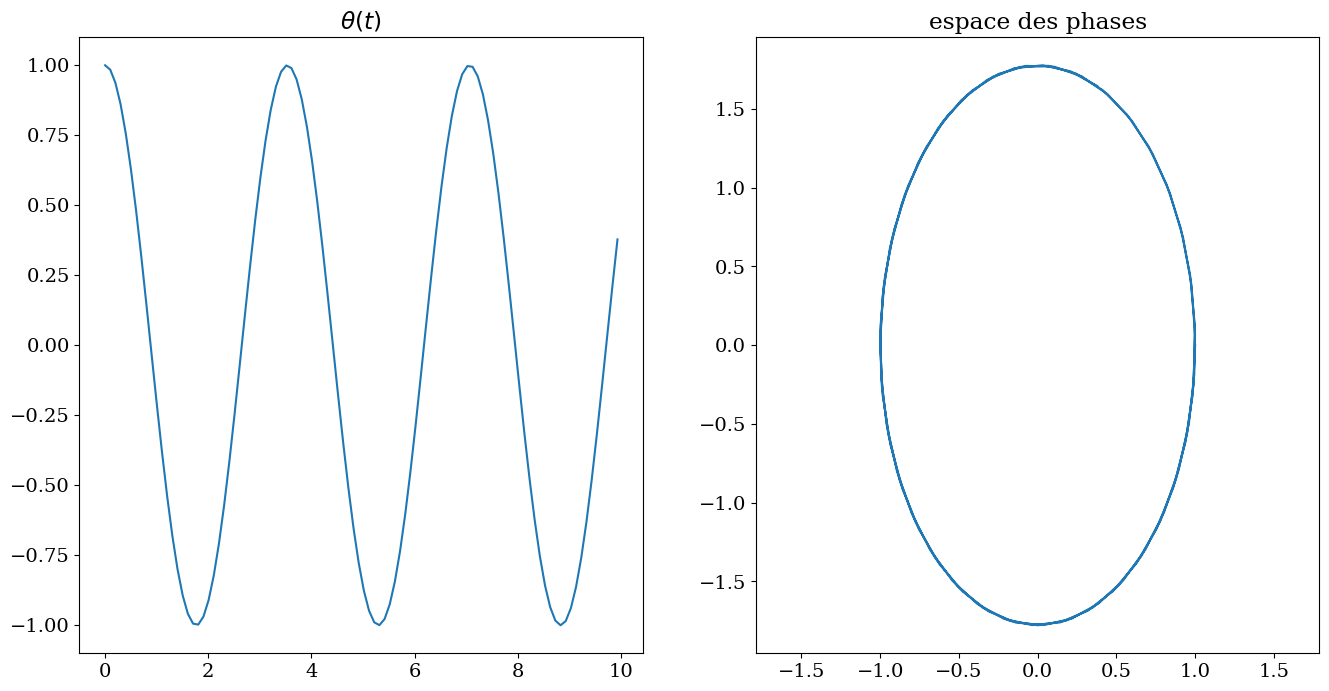

In [9]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(T,Y)
plt.title("$\\theta(t)$")
plt.subplot(1,2,2)
plt.plot(Y,dY)
plt.axis('equal')
plt.title("espace des phases")

## Problème raide: réaction chimique

$$ \frac{dY}{dt} = F(Y,t) $$
soit
\begin{eqnarray}
 \dot{y_0} &=& y_1 \\
 \dot{y_1} &=& \mu (1-y_0^2) y_1 - y_0 \\
\end{eqnarray}

plus $\mu$ est grand, plus le système est difficile ! 

In [10]:
mu=None
def rhs(t,Y,dY):
    global mu,nit
    nit  += 1
    dY[0] = Y[1] 
    dY[1] = mu*(1-Y[0]**2)*Y[1]-Y[0]
    return 

In [11]:
# parametres
mu   = 10
# cas raide
mu   = 100.0
#mu   = 1000.0
tmax = 100.
# temps plus long
tmax = 500
t0 = 0.0
y0 = np.array([2. , 0.])

In [12]:
# définition du model et utilisation du solveur
SOLVER = 'dopri5'
t      = np.linspace(0, tmax,100)
initial_values = y0
#ode_solver = ode(SOLVER, rhs, old_api=False, max_steps=5000)
ode_solver = ode(SOLVER, rhs, old_api=False)
nit = 0
output = ode_solver.solve(t, initial_values)
print("Nbre d'appel a rhs: ",nit)
if output.errors.t:
    print ('Error: ', output.message, 'Error at time', output.errors.t)
output.message

Nbre d'appel a rhs:  30168
Error:  Unexpected idid, check warnings for info Error at time 85.85858585858585


/home/buffat/venvs/jupyter/lib/python3.10/site-packages/scipy/integrate/_ode.py:1179: UserWarning: dopri5: larger nsteps is needed
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


'Unexpected idid, check warnings for info'

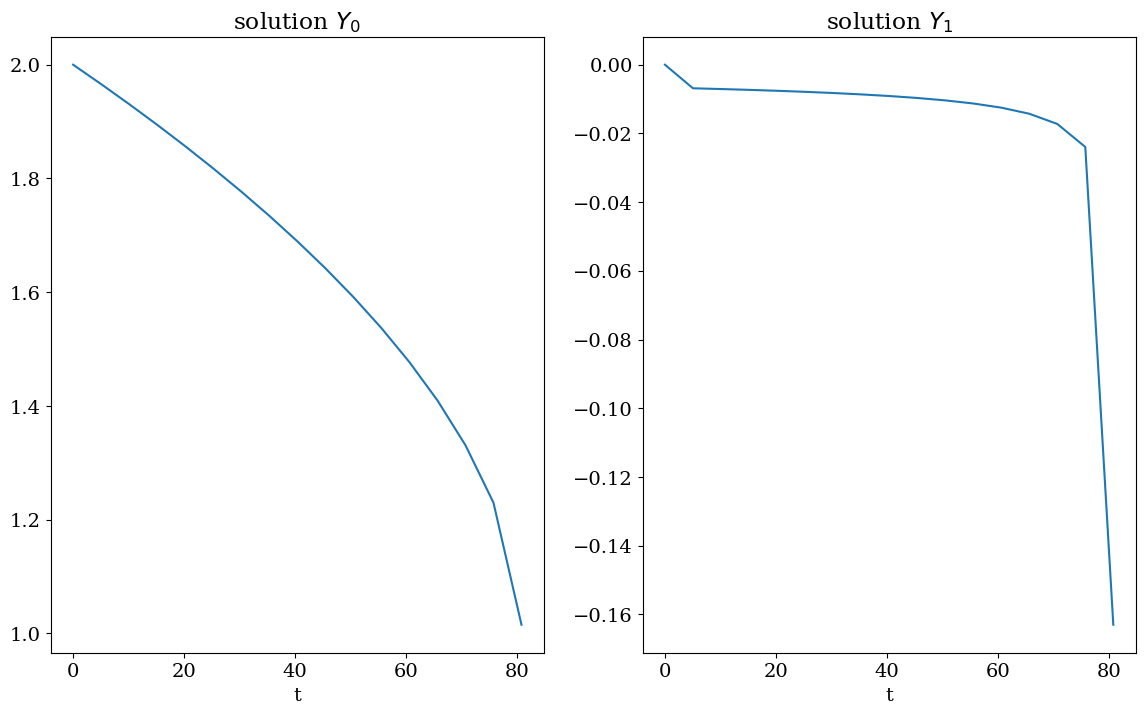

In [13]:
T = output.values.t
Y = output.values.y
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(T,Y[:,0])
plt.title("solution $Y_0$")
plt.xlabel('t');
plt.subplot(1,2,2)
plt.plot(T,Y[:,1])
plt.title("solution $Y_1$")
plt.xlabel('t');

### solveur raide

In [14]:
# définition du model et utilisation du solveur
#tmax = 2000
SOLVER = 'cvode'
t      = np.linspace(0, tmax,100)
initial_values = y0
ode_solver = ode(SOLVER, rhs, old_api=False, max_steps=5000)
nit = 0
output = ode_solver.solve(t, initial_values)
print("Nbre d'appel a rhs: ",nit)
if output.errors.t:
    print ('Error: ', output.message, 'Error at time', output.errors.t)
output.message

Nbre d'appel a rhs:  4763


'Successful function return.'

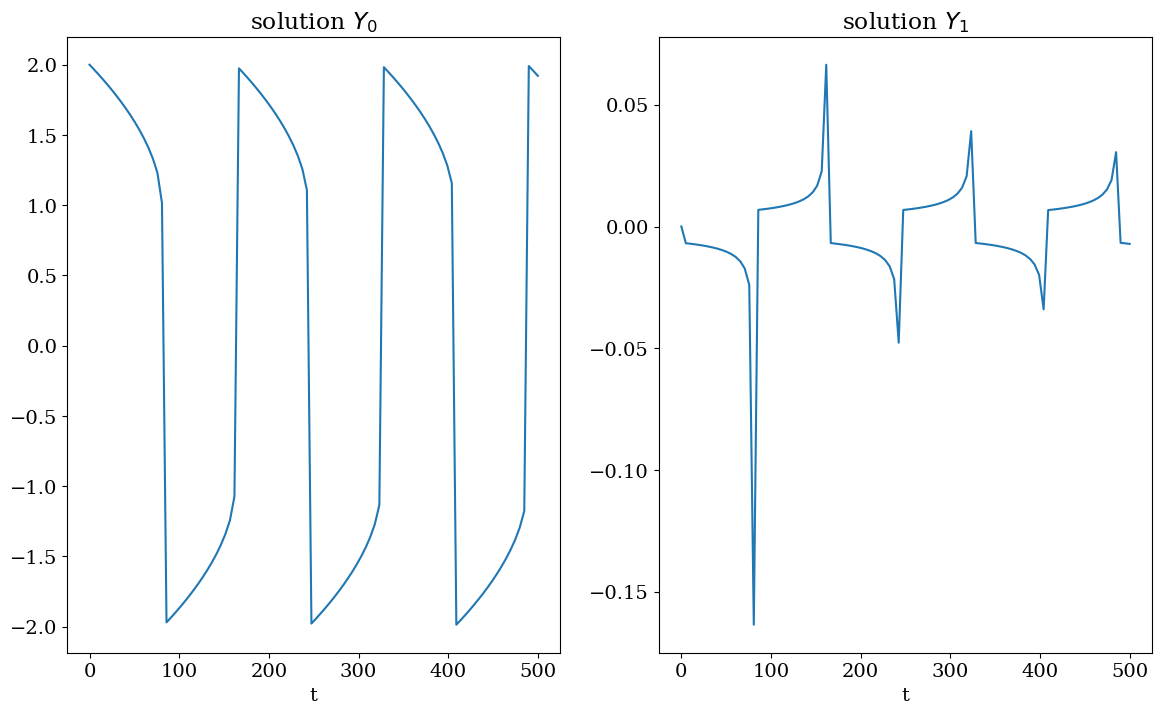

In [15]:
T = output.values.t
Y = output.values.y
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(T,Y[:,0])
plt.title("solution $Y_0$")
plt.xlabel('t');
plt.subplot(1,2,2)
plt.plot(T,Y[:,1])
plt.title("solution $Y_1$")
plt.xlabel('t');

## DAE

pendule simple avec contrainte: $x^2+y^2=l^2$

Problème initiale: DAE d'ordre 2

$$ m\ddot{x}=-2\lambda x $$
$$ m\ddot{y}+mgy=-2\lambda y$$
$$0=x^{2}+y^{2}-l^{2}$$

Transformation en DAE d'ordre 1, mais d'index 2

$$
\left[\begin{array}{ccccc}
m\\
 & m\\
 &  & 1\\
 &  &  & 1\\
 &  &  &  & 0
\end{array}\right]\dot{\left[\begin{array}{c}
u\\
v\\
x\\
y\\
\lambda
\end{array}\right]}=\left[\begin{array}{c}
-2\lambda x\\
-2\lambda y-mg\\
u\\
v\\
x^{2}+y^{2}-l^{2}
\end{array}\right]
$$

In [26]:
# EDO sous forme implicite avec contrainte
# parametre de penalisation
beta=0.0
#beta=1.0e2
# Y = [x,y,dx,dy,lambda]
def residu(t,Y,dY,res):
    global nit
    nit += 1
    res[0]=dY[0]-Y[2]
    res[1]=dY[1]-Y[3]
    res[2]=dY[2]+2*Y[4]*Y[0]
    res[3]=dY[3]+2*Y[4]*Y[1]+g
    res[4]=Y[2]**2+Y[3]**2-2*Y[4]*l-g*Y[1] + beta*(Y[0]*Y[0]+Y[1]*Y[1]-l*l)
    return

In [27]:
# C.I.
t0 = 0.0
Y0 = [1.0, 0.0, 0.0, 0.0, 0.0]
dY0= [0.0, 0.0, 0.0, -g, 0.0]

In [28]:
# temps
periode=2*np.pi/np.sqrt(g/l)
tfinal = 5*periode
N=500

In [29]:
solver = dae('ida', residu, compute_initcond='yp0',
             first_step_size=1e-18,
             atol=1e-6,rtol=1e-6,
             algebraic_vars_idx=[4],
             old_api=False, max_steps=5000)
t = np.linspace(0,tfinal,N)
nit = 0
solution = solver.solve(t,Y0,dY0)
print("Nbre d'appel a rhs: ",nit)
if solution.errors.t:
    print ('Error: ', solution.message, 'Error at time', solution.errors.t)
solution.message

Nbre d'appel a rhs:  2491


'Successful function return.'

Text(0.5, 1.0, 'contrainte l=cste')

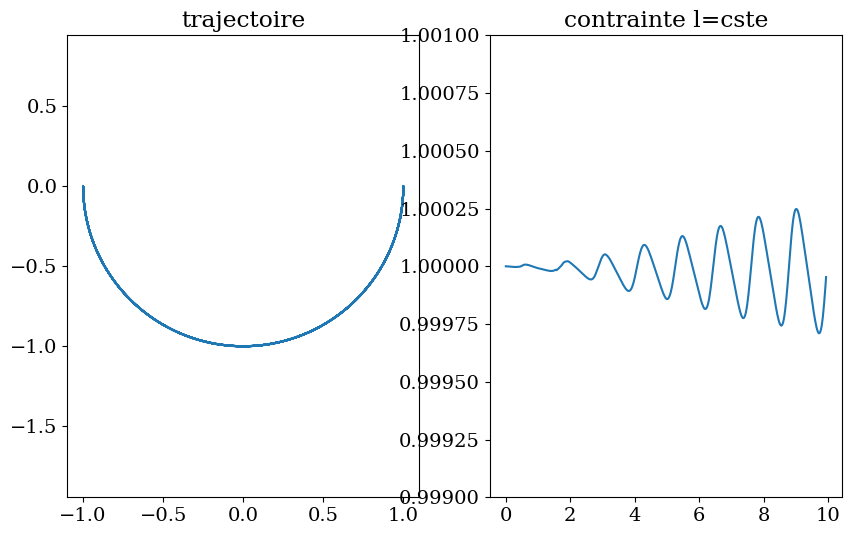

In [31]:
T = solution.values.t
Y = solution.values.y
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(Y[:,0],Y[:,1])
plt.axis('equal')
plt.title('trajectoire')
plt.subplot(1,2,2)
plt.plot(T,Y[:,0]**2+Y[:,1]**2)
eps=0.001
plt.ylim([l*(1.-eps),l*(1.+eps)])
plt.title('contrainte l=cste')


##  probleme bille
<center>
<img style="float:center; display:inline; width:300px;" src="images/bille.png" alt="Bille" />
</center>
trajectoire d'une bille sur une aiguille en rotation:
- (u1,u3) coordonnees de la bille
- (u2,u4) vitesse
- u5 = lambda multiplicateur Lagrange
- coefficiants directeur de la tige

      c = cos(omega*(t+t0))
      s = sin(omega*(t+t0))
- fr coefficiant de frottement 
- equations

      u1' =   u2
      u2' = - fr*u2 + lambda*c
      u3' =   u4
      u4' = - fr*u4 - lambda*s + g
      
 - contrainte sur la bille B : OB=(u1,u3) // tige (c,s)
 
       0 = c*u3 - s*u1


In [35]:
def rhs(t,u):
    s = np.sin(t+np.pi/4)
    c = np.cos(t+np.pi/4)
    up = np.zeros(5)
    up[0] =   u[1]
    up[1] = - 10*u[1] + u[4]*s
    up[2] =   u[3]
    up[3] = - 10*u[3] - u[4]*c + 1
    # contrainte
    g     =  c*u[2] - s*u[0] 
    gp    =  c*(u[3] - u[0]) + s*( - u[1] - u[2])
    gpp   =  c*(up[3] - up[0] - u[1] - u[2]) \
           + s*(- up[1] - up[2] - u[3] + u[0])
    # penalisation
    up[4] = gpp + 20*gp + 100*g
    return up
# residu
def residu(t,u,du,res):
    global nit
    nit+=1
    res[:] = du - rhs(t,u)
    return

In [36]:
# cdt initiale
t0 = 0.0
Y0 = np.array([0.5,-0.5,0.5,0.5,0]);  
dY0 = rhs(t0,Y0)

In [37]:
tfinal=15
N = 200
solver = dae('ida', residu, compute_initcond='yp0',
             first_step_size=1e-18,
             atol=1e-6,rtol=1e-6,
             algebraic_vars_idx=[4],
             old_api=False, max_steps=5000)
t = np.linspace(0,tfinal,N)
nit = 0
solution = solver.solve(t,Y0,dY0)
print("Nbre d'appel a rhs: ",nit)
if solution.errors.t:
    print ('Error: ', solution.message, 'Error at time', solution.errors.t)
solution.message

Nbre d'appel a rhs:  766


'Successful function return.'

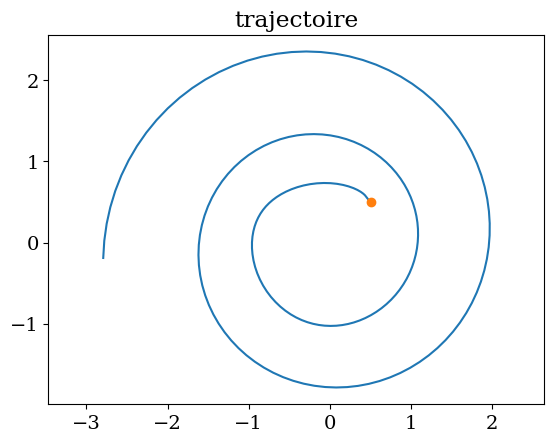

In [38]:
T = solution.values.t
Y = solution.values.y
plt.plot(Y[:,0],Y[:,2])
plt.plot(Y0[0],Y0[2],'o')
plt.title("trajectoire")
plt.axis('equal');

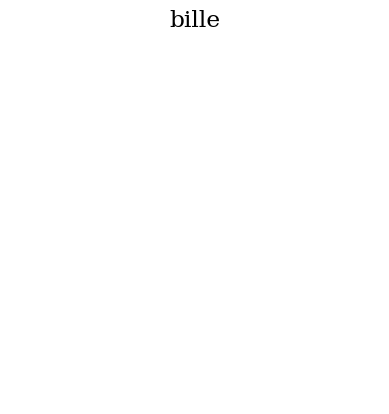

In [39]:
#
# animation
# =========
fig=plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_axis_off()
ax.set_xlim((-3.,3.))
ax.set_ylim((-3.,3.))
plt.title('bille')
fig.set_facecolor("#ffffff")
line1, = ax.plot([], [], '-k', lw=2)
line, = ax.plot([], [], 'o', lw=1 , markersize=30)
def init():
    line.set_data([], [])
    line1.set_data([], [])
    return line,
def animate(i):
    x = Y[i,0]
    y = Y[i,2]
    thisx = [x]
    thisy = [y]
    line1.set_data([0.,3*np.cos((T[i]+np.pi/4))],[0.,3*np.sin((T[i]+np.pi/4))])
    line.set_data(thisx, thisy)
    return line,

anim = animation.FuncAnimation(fig, animate, np.arange(1, N), interval=50, blit=True, init_func=init);

In [40]:
HTML(anim.to_html5_video())

## Fin